https://blog.csdn.net/amyniez/article/details/127815384

In [1]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

D:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
safetyA = pd.read_csv('safetyA.csv')
safetyA 

,mu,sidewalk,building,wall,fence,pole,traffic light,traffic sign,nature,sky,...,motorcycle,bicycle,street furniture,street item,rail,sign,stair,lightning,ashcan,road
0,43.189172,0.000000,0.023945,0.001282,0.015162,0.006958,0.000000,7.417050e-04,0.857167,0.000513,...,0.000000,0.000000,0.000000,0.001599,0.008460,0.000000,0.0,0.006855,0.0,0.091602
1,42.979203,0.000000,0.001634,0.000000,0.000742,0.000787,0.000000,3.520000e-05,0.875417,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000041,0.0,0.099039
2,42.855485,0.174593,0.074658,0.033964,0.028908,0.002056,0.000027,1.123650e-04,0.561865,0.030822,...,0.000000,0.000101,0.024109,0.000000,0.028227,0.000000,0.0,0.001355,0.0,0.043083
3,42.707324,0.021051,0.015089,0.014300,0.026888,0.001280,0.000002,5.060000e-05,0.830551,0.000637,...,0.000000,0.000000,0.000000,0.000000,0.003916,0.000235,0.0,0.000000,0.0,0.089862
4,42.117528,0.000215,0.077542,0.001798,0.004691,0.004136,0.000056,2.864580e-04,0.829267,0.000610,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.003784,0.0,0.074511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,12.289283,0.126535,0.565562,0.000000,0.000000,0.000000,0.000011,1.523920e-04,0.025223,0.028955,...,0.053624,0.008360,0.000000,0.004087,0.000000,0.000667,0.0,0.000000,0.0,0.142348
260,12.253148,0.000424,0.487885,0.000000,0.000023,0.006614,0.000000,4.820000e-07,0.295078,0.003000,...,0.000000,0.000077,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.103212
261,12.248489,0.041974,0.683895,0.000000,0.000000,0.002178,0.000015,2.112270e-04,0.039831,0.037654,...,0.002844,0.001385,0.000000,0.000000,0.000000,0.000012,0.0,0.000000,0.0,0.138096
262,11.649562,0.017684,0.450463,0.000000,0.000472,0.061725,0.000000,2.188465e-03,0.086236,0.000918,...,0.000000,0.000105,0.000000,0.000000,0.000000,0.011769,0.0,0.000000,0.0,0.107134


## 1 样本拆分

In [64]:
X = safetyA.drop('mu', axis = 1)
y = safetyA['mu']


In [65]:
y

0      43.189172
1      42.979203
2      42.855485
3      42.707324
4      42.117528
         ...    
259    12.289283
260    12.253148
261    12.248489
262    11.649562
263    10.187188
Name: mu, Length: 264, dtype: float64

In [66]:
df_train, df_test = train_test_split(safetyA, test_size=0.25, random_state=12) 
# random_state随机状态：保证每次分割的样本一致

df_train = df_train[list(safetyA.columns)] 
# 获取数据列名

df_test = df_test[list(safetyA.columns)]

X_train, y_train = df_train.drop('mu',axis=1), df_train['mu']
X_test, y_test = df_test.drop('mu',axis=1), df_test['mu']

X_train.shape,y_train.shape,X_test.shape,y_test.shape



((198, 22), (198,), (66, 22), (66,))

In [67]:
df_train

,mu,sidewalk,building,wall,fence,pole,traffic light,traffic sign,nature,sky,...,motorcycle,bicycle,street furniture,street item,rail,sign,stair,lightning,ashcan,road
63,29.901936,0.013089,0.369500,0.013512,0.014031,0.002465,0.000071,0.002998,0.292335,0.030587,...,0.000171,0.008367,0.000000,0.022412,0.000000,0.003724,0.000000,0.000000,0.014985,0.202197
193,16.290187,0.015242,0.277332,0.000003,0.007298,0.001600,0.001804,0.000688,0.218577,0.001794,...,0.163569,0.004559,0.000000,0.000000,0.000000,0.009199,0.000000,0.000000,0.000000,0.238692
51,32.359691,0.006109,0.311359,0.002014,0.046762,0.039909,0.000000,0.029950,0.389654,0.001650,...,0.000993,0.006854,0.000000,0.000006,0.000000,0.036718,0.000969,0.000991,0.000082,0.161253
75,27.627158,0.057534,0.331916,0.000735,0.005132,0.007594,0.000115,0.000636,0.395104,0.009756,...,0.020650,0.011674,0.000000,0.000000,0.000026,0.000541,0.000000,0.000000,0.000000,0.139673
206,15.559246,0.000785,0.579516,0.000000,0.139587,0.000377,0.000002,0.002563,0.074002,0.067362,...,0.001575,0.003606,0.002414,0.000000,0.000000,0.002072,0.000000,0.000000,0.000000,0.083833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,12.289283,0.126535,0.565562,0.000000,0.000000,0.000000,0.000011,0.000152,0.025223,0.028955,...,0.053624,0.008360,0.000000,0.004087,0.000000,0.000667,0.000000,0.000000,0.000000,0.142348
130,21.854022,0.029401,0.459506,0.000000,0.010093,0.001444,0.000041,0.000263,0.346874,0.000000,...,0.001294,0.003836,0.000000,0.000000,0.000000,0.000237,0.005384,0.000000,0.000000,0.139199
241,14.158243,0.020792,0.251015,0.000822,0.001235,0.003234,0.000000,0.002895,0.271938,0.000000,...,0.054934,0.002265,0.000000,0.014844,0.000000,0.002614,0.000000,0.001040,0.020847,0.099746
253,12.724805,0.002028,0.508431,0.000000,0.000000,0.000739,0.000099,0.001101,0.021477,0.099435,...,0.030063,0.010674,0.000000,0.000000,0.000000,0.000266,0.000000,0.000000,0.000000,0.107939


In [68]:
df_test 

,mu,sidewalk,building,wall,fence,pole,traffic light,traffic sign,nature,sky,...,motorcycle,bicycle,street furniture,street item,rail,sign,stair,lightning,ashcan,road
87,26.223404,0.014934,0.016288,0.010466,0.021914,0.010056,0.000711,0.006362,0.527261,0.024302,...,0.002118,1.191170e-04,0.002448,0.016337,0.000000,0.000530,0.000000,0.000000,0.000000,0.235631
122,22.999454,0.072433,0.341113,0.015449,0.000000,0.000296,0.000048,0.000002,0.277017,0.001494,...,0.023902,1.287616e-03,0.000000,0.006410,0.000000,0.000000,0.000000,0.000237,0.000000,0.219847
11,39.575792,0.005968,0.013196,0.005542,0.011296,0.007906,0.000000,0.000423,0.825304,0.000646,...,0.000000,0.000000e+00,0.001605,0.000000,0.000000,0.000122,0.000000,0.017999,0.000000,0.126480
48,33.117605,0.008997,0.011145,0.007239,0.062115,0.021828,0.004440,0.001684,0.473691,0.182376,...,0.002224,1.829668e-03,0.000000,0.000000,0.035617,0.000149,0.014052,0.000000,0.000000,0.189893
52,32.179104,0.005224,0.385815,0.000429,0.006927,0.016526,0.000000,0.000039,0.267986,0.000000,...,0.000000,2.121045e-02,0.000000,0.001019,0.000106,0.001437,0.000000,0.000013,0.000000,0.224192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,35.952257,0.000036,0.273057,0.001245,0.000104,0.051143,0.001307,0.008945,0.431781,0.022394,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.007907,0.000000,0.034877,0.000852,0.160561
23,37.388218,0.000917,0.050885,0.007705,0.027346,0.008483,0.000526,0.014228,0.597256,0.067705,...,0.000539,2.813947e-02,0.000000,0.000000,0.000000,0.011352,0.000000,0.001254,0.001247,0.188559
90,25.866849,0.004673,0.515233,0.004966,0.030290,0.000446,0.000004,0.001040,0.257727,0.000000,...,0.000000,9.650000e-07,0.000000,0.000000,0.001469,0.000940,0.000000,0.000000,0.002294,0.166170
139,20.878793,0.002737,0.177709,0.000488,0.027259,0.016648,0.001596,0.000279,0.626390,0.036027,...,0.000000,8.830000e-05,0.000000,0.004972,0.000000,0.002819,0.000000,0.000291,0.000000,0.105737


## 2 样本拟合

In [69]:
rf = RandomForestRegressor(n_estimators=200,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            oob_score=True,
                            random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=5, n_estimators=200, n_jobs=-1,
                      oob_score=True, random_state=42)

### 2.1 基尼不纯度

In [70]:
rf.feature_importances_

array([1.61807597e-02, 4.79753078e-02, 1.89266805e-02, 4.89704434e-02,
       1.27641353e-02, 8.56661905e-03, 1.15680419e-02, 4.98615441e-01,
       2.16070803e-02, 1.84631738e-02, 1.05456443e-02, 1.35542157e-01,
       5.05432316e-02, 2.36657300e-02, 4.97109693e-04, 3.89682879e-03,
       2.70440114e-02, 1.22083307e-02, 0.00000000e+00, 4.82546822e-03,
       1.27488641e-03, 2.63189193e-02])

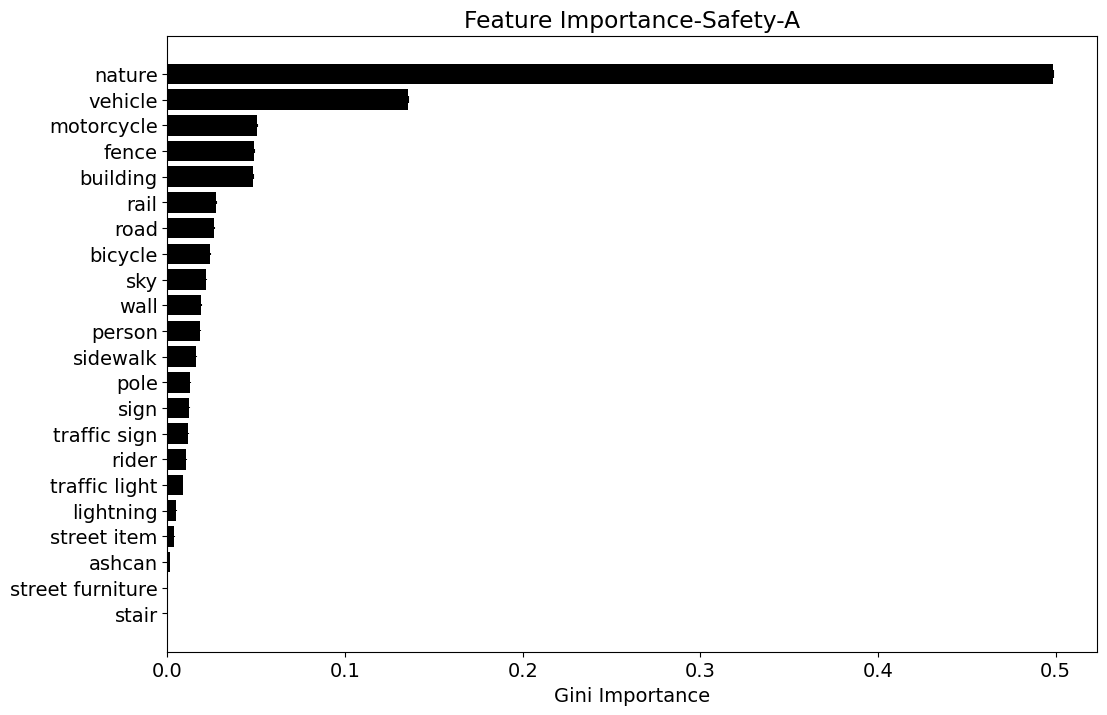

In [71]:
features = np.array(X_train.columns)

# gini不纯度
imps_gini=rf.feature_importances_
std_gini = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0) # 计算标准差
indices_gini = np.argsort(imps_gini) # 将imps_gini中的元素从小到大排列，提取其在排列前对应的index(索引)输出

plt.title('Feature Importance-Safety-A')
# plt.barh（）：横向的柱状图，可以理解为正常柱状图旋转了90°
plt.barh(range(len(indices_gini)), imps_gini[indices_gini], yerr=std_gini[indices_gini],color='k', align='center')
plt.yticks(range(len(indices_gini)), features[indices_gini])
plt.xlabel('Gini Importance')
plt.show()


### 2.2 Permutation Importance（permutation_importances）

In [23]:
perm_importance = permutation_importance(rf, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

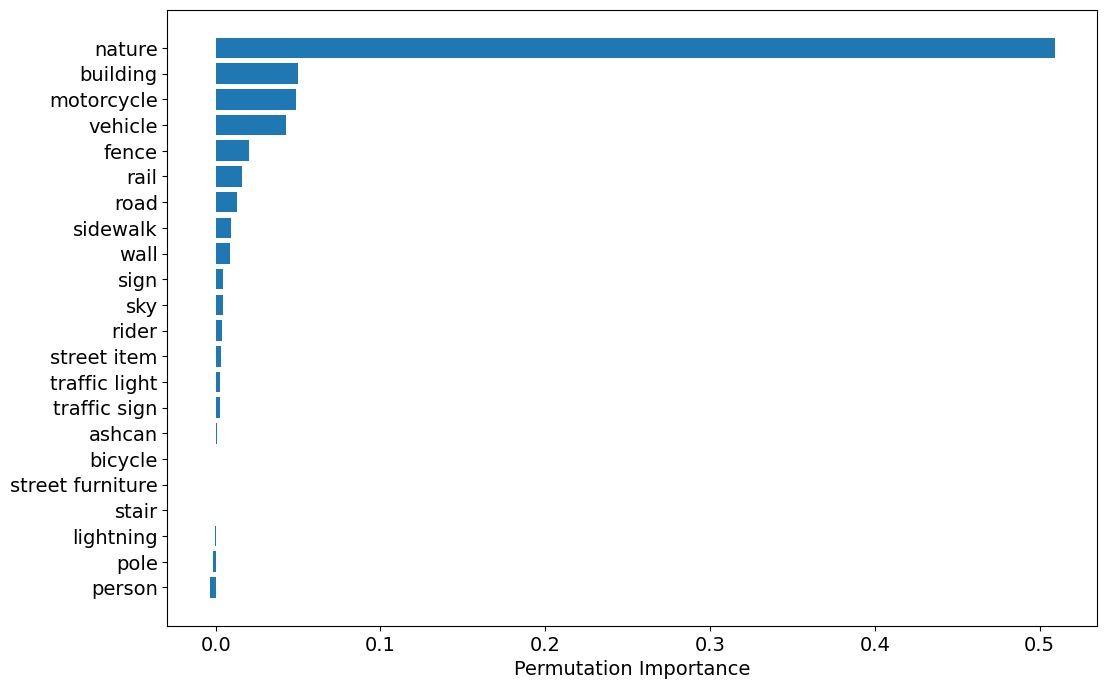

In [24]:
features = np.array(X_train.columns)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

## safetyB

In [72]:
safetyB = pd.read_csv('safetyB.csv')
safetyB 

,mu,road,sidewalk,building,wall,fence,pole,traffic light,traffic sign,nature,...,vehicle,motorcycle,bicycle,street furniture,street item,rail,sign,stair,lightning,ashcan
0,43.393922,0.140868,0.018809,0.328293,0.015717,0.098688,0.000943,0.000010,0.000523,0.395436,...,0.000323,0.000000,0.000000,0.0,0.000000,0.032399,0.000000,0.0,0.000000,0.000000
1,40.252982,0.123867,0.015592,0.465299,0.000478,0.033026,0.005913,0.001043,0.005074,0.296399,...,0.015864,0.000170,0.007017,0.0,0.022282,0.000002,0.021339,0.0,0.000879,0.000102
2,39.296647,0.152571,0.006303,0.311323,0.001564,0.078821,0.000669,0.000246,0.001910,0.438530,...,0.000207,0.000000,0.001082,0.0,0.000000,0.011433,0.001886,0.0,0.000000,0.000000
3,39.231259,0.082230,0.007400,0.225731,0.015837,0.131274,0.001361,0.000000,0.000552,0.526097,...,0.000447,0.000000,0.003898,0.0,0.002326,0.007208,0.024238,0.0,0.002080,0.000000
4,38.947158,0.056443,0.052737,0.370177,0.000818,0.017477,0.000107,0.000000,0.000030,0.496168,...,0.001764,0.000000,0.000000,0.0,0.000000,0.005300,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,12.353725,0.206825,0.022125,0.575907,0.000000,0.000000,0.003254,0.000000,0.002149,0.035931,...,0.004188,0.021153,0.015893,0.0,0.002792,0.000000,0.002309,0.0,0.000205,0.006023
258,12.317394,0.092274,0.000053,0.591838,0.000000,0.000209,0.005199,0.000051,0.000281,0.051601,...,0.151232,0.048618,0.001942,0.0,0.000000,0.000000,0.002286,0.0,0.000000,0.000000
259,12.067494,0.181481,0.000000,0.467262,0.000000,0.000000,0.001275,0.000034,0.000093,0.028585,...,0.261389,0.001284,0.000246,0.0,0.003318,0.000000,0.000000,0.0,0.000000,0.000000
260,11.821394,0.112390,0.012864,0.139911,0.022371,0.010343,0.001495,0.001206,0.000316,0.493118,...,0.026235,0.008978,0.068994,0.0,0.000000,0.000000,0.000013,0.0,0.000000,0.000000


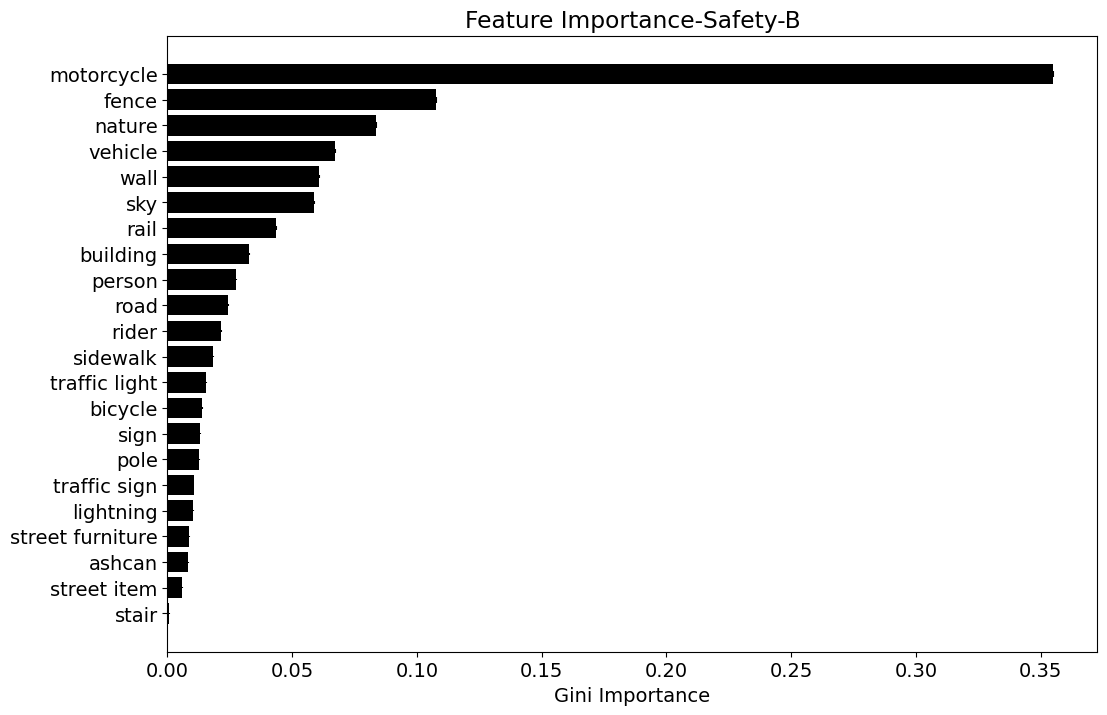

In [73]:

X = safetyB.drop('mu', axis = 1)
y = safetyB['mu']
df_train, df_test = train_test_split(safetyB, test_size=0.25, random_state=12) 
# random_state随机状态：保证每次分割的样本一致

df_train = df_train[list(safetyB.columns)] 
# 获取数据列名

df_test = df_test[list(safetyB.columns)]

X_train, y_train = df_train.drop('mu',axis=1), df_train['mu']
X_test, y_test = df_test.drop('mu',axis=1), df_test['mu']

X_train.shape,y_train.shape,X_test.shape,y_test.shape



rf = RandomForestRegressor(n_estimators=200,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            oob_score=True,
                            random_state=42)
rf.fit(X_train, y_train)


features = np.array(X_train.columns)

# gini不纯度
imps_gini=rf.feature_importances_
std_gini = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0) # 计算标准差
indices_gini = np.argsort(imps_gini) 
# 将imps_gini中的元素从小到大排列，提取其在排列前对应的index(索引)输出

plt.title('Feature Importance-Safety-B')

plt.barh(range(len(indices_gini)), imps_gini[indices_gini], yerr=std_gini[indices_gini],color='k', align='center')
plt.yticks(range(len(indices_gini)), features[indices_gini])
plt.xlabel('Gini Importance')
plt.show()


## safetyC

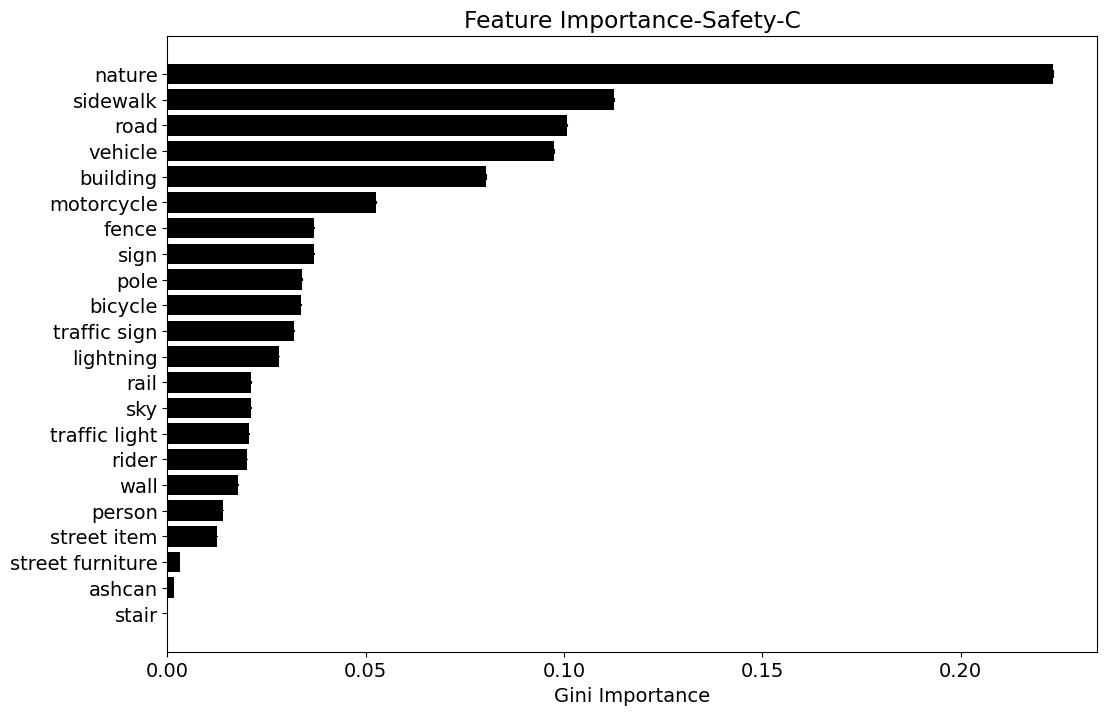

In [74]:
safetyC = pd.read_csv('safetyC.csv')

X = safetyC.drop('mu', axis = 1)
y = safetyC['mu']
df_train, df_test = train_test_split(safetyC, test_size=0.25, random_state=12) 
# random_state随机状态：保证每次分割的样本一致

df_train = df_train[list(safetyC.columns)] 
# 获取数据列名

df_test = df_test[list(safetyC.columns)]

X_train, y_train = df_train.drop('mu',axis=1), df_train['mu']
X_test, y_test = df_test.drop('mu',axis=1), df_test['mu']

X_train.shape,y_train.shape,X_test.shape,y_test.shape



rf = RandomForestRegressor(n_estimators=200,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            oob_score=True,
                            random_state=42)
rf.fit(X_train, y_train)


features = np.array(X_train.columns)

# gini不纯度
imps_gini=rf.feature_importances_
std_gini = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0) # 计算标准差
indices_gini = np.argsort(imps_gini) 
# 将imps_gini中的元素从小到大排列，提取其在排列前对应的index(索引)输出

plt.title('Feature Importance-Safety-C')
# plt.barh（）：横向的柱状图，可以理解为正常柱状图旋转了90°
plt.barh(range(len(indices_gini)), imps_gini[indices_gini], yerr=std_gini[indices_gini],color='k', align='center')
plt.yticks(range(len(indices_gini)), features[indices_gini])
plt.xlabel('Gini Importance')
plt.show()



## comfort A

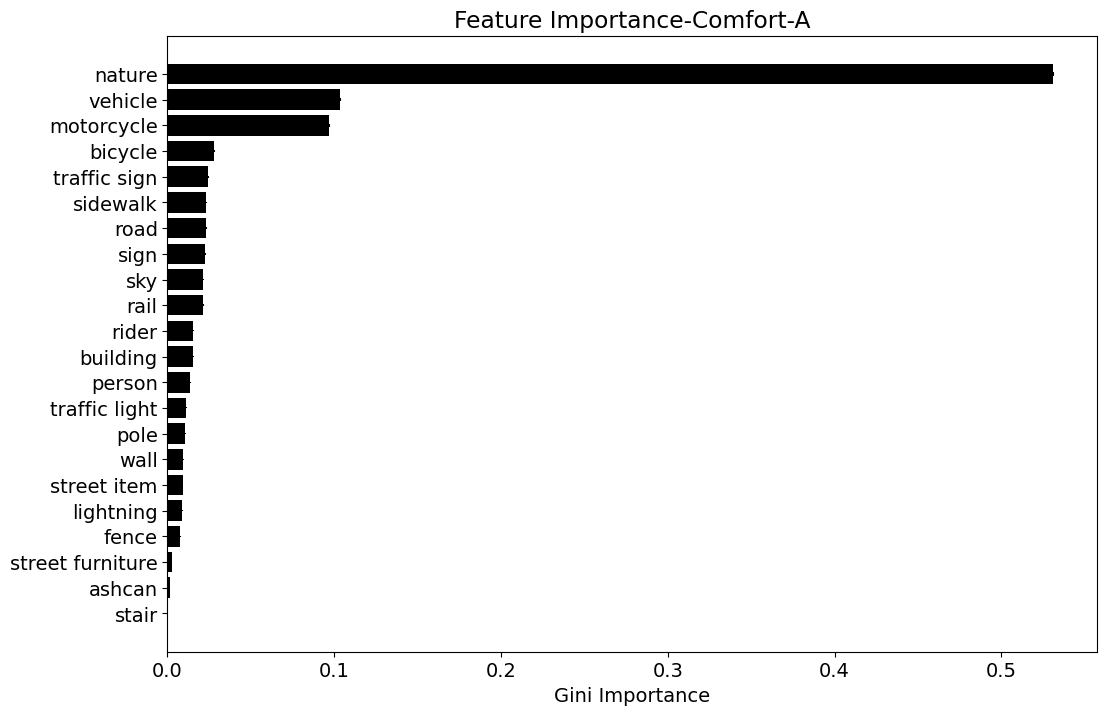

In [75]:
comfortA = pd.read_csv('comfortA.csv')

X = comfortA.drop('mu', axis = 1)
y = comfortA['mu']
df_train, df_test = train_test_split(comfortA, test_size=0.25, random_state=12) 
# random_state随机状态：保证每次分割的样本一致

df_train = df_train[list(comfortA.columns)] 
# 获取数据列名

df_test = df_test[list(comfortA.columns)]

X_train, y_train = df_train.drop('mu',axis=1), df_train['mu']
X_test, y_test = df_test.drop('mu',axis=1), df_test['mu']

X_train.shape,y_train.shape,X_test.shape,y_test.shape



rf = RandomForestRegressor(n_estimators=200,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            oob_score=True,
                            random_state=42)
rf.fit(X_train, y_train)


features = np.array(X_train.columns)

# gini不纯度
imps_gini=rf.feature_importances_
std_gini = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0) # 计算标准差
indices_gini = np.argsort(imps_gini) 
# 将imps_gini中的元素从小到大排列，提取其在排列前对应的index(索引)输出

plt.title('Feature Importance-Comfort-A')
# plt.barh（）：横向的柱状图，可以理解为正常柱状图旋转了90°
plt.barh(range(len(indices_gini)), imps_gini[indices_gini], yerr=std_gini[indices_gini],color='k', align='center')
plt.yticks(range(len(indices_gini)), features[indices_gini])
plt.xlabel('Gini Importance')
plt.show()



## comfort B

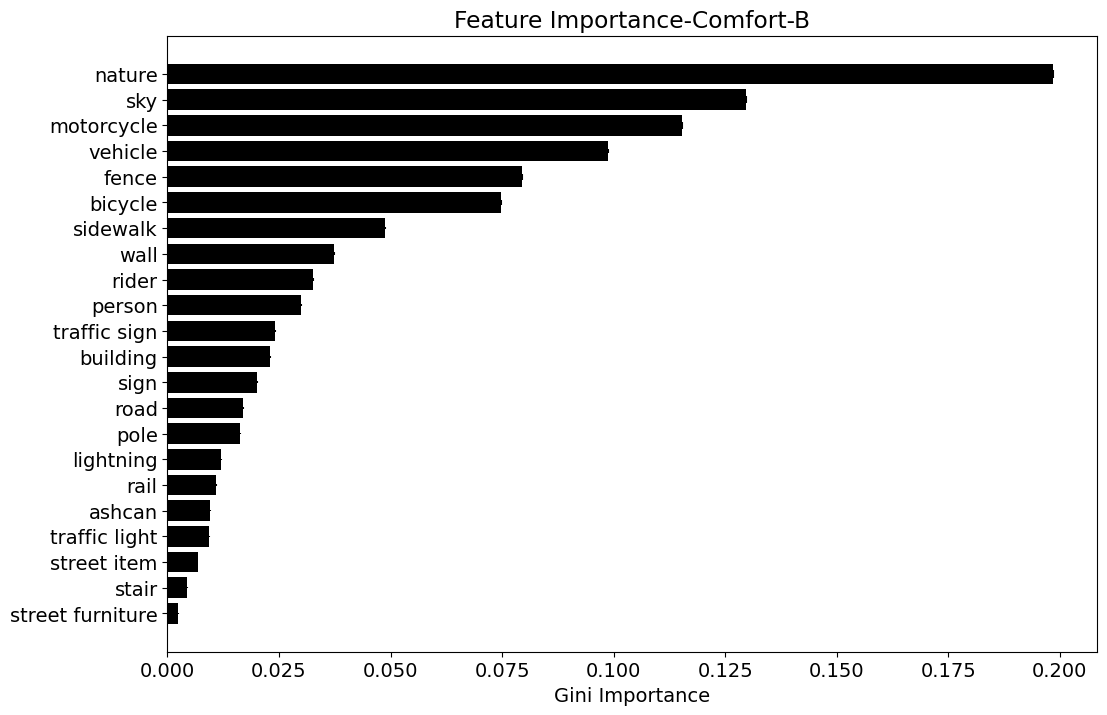

In [76]:
comfortB = pd.read_csv('comfortB.csv')

X = comfortB.drop('mu', axis = 1)
y = comfortB['mu']
df_train, df_test = train_test_split(comfortB, test_size=0.25, random_state=12) 
# random_state随机状态：保证每次分割的样本一致

df_train = df_train[list(comfortB.columns)] 
# 获取数据列名

df_test = df_test[list(comfortB.columns)]

X_train, y_train = df_train.drop('mu',axis=1), df_train['mu']
X_test, y_test = df_test.drop('mu',axis=1), df_test['mu']

X_train.shape,y_train.shape,X_test.shape,y_test.shape



rf = RandomForestRegressor(n_estimators=200,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            oob_score=True,
                            random_state=42)
rf.fit(X_train, y_train)


features = np.array(X_train.columns)

# gini不纯度
imps_gini=rf.feature_importances_
std_gini = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0) # 计算标准差
indices_gini = np.argsort(imps_gini) 
# 将imps_gini中的元素从小到大排列，提取其在排列前对应的index(索引)输出

plt.title('Feature Importance-Comfort-B')
# plt.barh（）：横向的柱状图，可以理解为正常柱状图旋转了90°
plt.barh(range(len(indices_gini)), imps_gini[indices_gini], yerr=std_gini[indices_gini],color='k', align='center')
plt.yticks(range(len(indices_gini)), features[indices_gini])
plt.xlabel('Gini Importance')
plt.show()



## comfort c

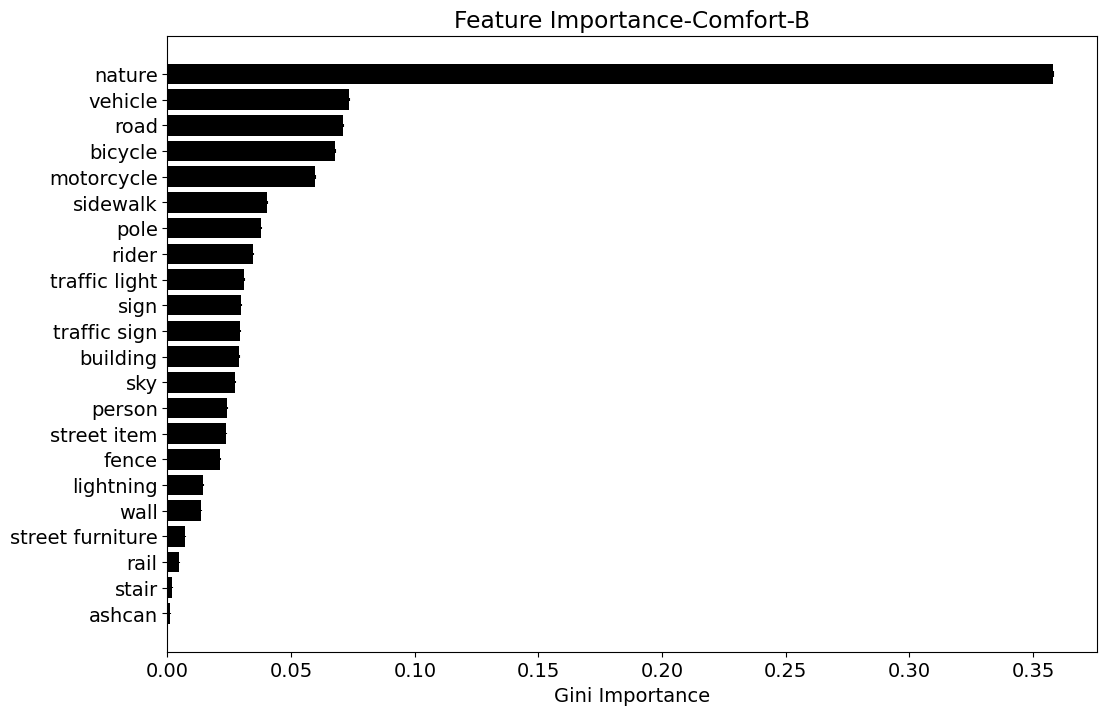

In [77]:
comfortC = pd.read_csv('comfortC.csv')

X = comfortC.drop('mu', axis = 1)
y = comfortC['mu']
df_train, df_test = train_test_split(comfortC, test_size=0.25, random_state=12) 
# random_state随机状态：保证每次分割的样本一致

df_train = df_train[list(comfortC.columns)] 
# 获取数据列名

df_test = df_test[list(comfortC.columns)]

X_train, y_train = df_train.drop('mu',axis=1), df_train['mu']
X_test, y_test = df_test.drop('mu',axis=1), df_test['mu']

X_train.shape,y_train.shape,X_test.shape,y_test.shape



rf = RandomForestRegressor(n_estimators=200,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            oob_score=True,
                            random_state=42)
rf.fit(X_train, y_train)


features = np.array(X_train.columns)

# gini不纯度
imps_gini=rf.feature_importances_
std_gini = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0) # 计算标准差
indices_gini = np.argsort(imps_gini) 
# 将imps_gini中的元素从小到大排列，提取其在排列前对应的index(索引)输出

plt.title('Feature Importance-Comfort-B')
# plt.barh（）：横向的柱状图，可以理解为正常柱状图旋转了90°
plt.barh(range(len(indices_gini)), imps_gini[indices_gini], yerr=std_gini[indices_gini],color='k', align='center')
plt.yticks(range(len(indices_gini)), features[indices_gini])
plt.xlabel('Gini Importance')
plt.show()



## interest A

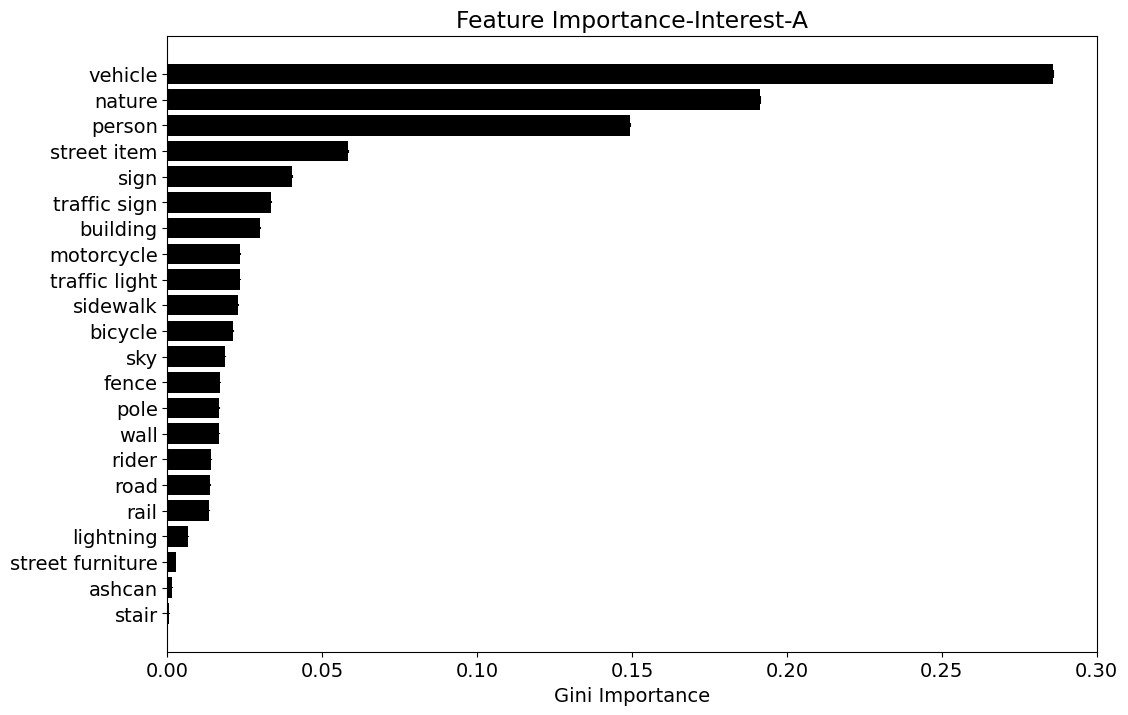

In [78]:
interestA = pd.read_csv('interestA.csv')

X = interestA.drop('mu', axis = 1)
y = interestA['mu']
df_train, df_test = train_test_split(interestA, test_size=0.25, random_state=12) 
# random_state随机状态：保证每次分割的样本一致

df_train = df_train[list(interestA.columns)] 
# 获取数据列名

df_test = df_test[list(interestA.columns)]

X_train, y_train = df_train.drop('mu',axis=1), df_train['mu']
X_test, y_test = df_test.drop('mu',axis=1), df_test['mu']

X_train.shape,y_train.shape,X_test.shape,y_test.shape



rf = RandomForestRegressor(n_estimators=200,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            oob_score=True,
                            random_state=42)
rf.fit(X_train, y_train)


features = np.array(X_train.columns)

# gini不纯度
imps_gini=rf.feature_importances_
std_gini = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0) # 计算标准差
indices_gini = np.argsort(imps_gini) 
# 将imps_gini中的元素从小到大排列，提取其在排列前对应的index(索引)输出

plt.title('Feature Importance-Interest-A')
# plt.barh（）：横向的柱状图，可以理解为正常柱状图旋转了90°
plt.barh(range(len(indices_gini)), imps_gini[indices_gini], yerr=std_gini[indices_gini],color='k', align='center')
plt.yticks(range(len(indices_gini)), features[indices_gini])
plt.xlabel('Gini Importance')
plt.show()

## interest B

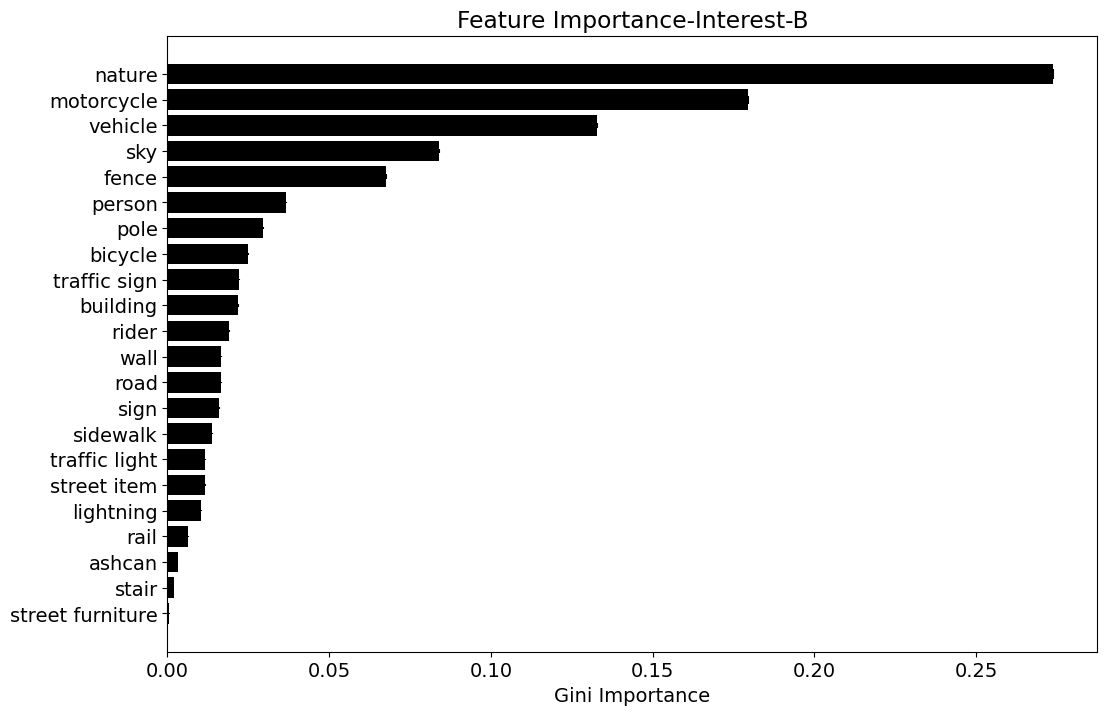

In [2]:
interestB = pd.read_csv('interestB.csv')

X = interestB.drop('mu', axis = 1)
y = interestB['mu']
df_train, df_test = train_test_split(interestB, test_size=0.25, random_state=12) 
# random_state随机状态：保证每次分割的样本一致

df_train = df_train[list(interestB.columns)] 
# 获取数据列名

df_test = df_test[list(interestB.columns)]

X_train, y_train = df_train.drop('mu',axis=1), df_train['mu']
X_test, y_test = df_test.drop('mu',axis=1), df_test['mu']

X_train.shape,y_train.shape,X_test.shape,y_test.shape



rf = RandomForestRegressor(n_estimators=200,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            oob_score=True,
                            random_state=42)
rf.fit(X_train, y_train)


features = np.array(X_train.columns)

# gini不纯度
imps_gini=rf.feature_importances_
std_gini = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0) # 计算标准差
indices_gini = np.argsort(imps_gini) 
# 将imps_gini中的元素从小到大排列，提取其在排列前对应的index(索引)输出

plt.title('Feature Importance-Interest-B')
# plt.barh（）：横向的柱状图，可以理解为正常柱状图旋转了90°
plt.barh(range(len(indices_gini)), imps_gini[indices_gini], yerr=std_gini[indices_gini],color='k', align='center')
plt.yticks(range(len(indices_gini)), features[indices_gini])
plt.xlabel('Gini Importance')
plt.show()

## interest C

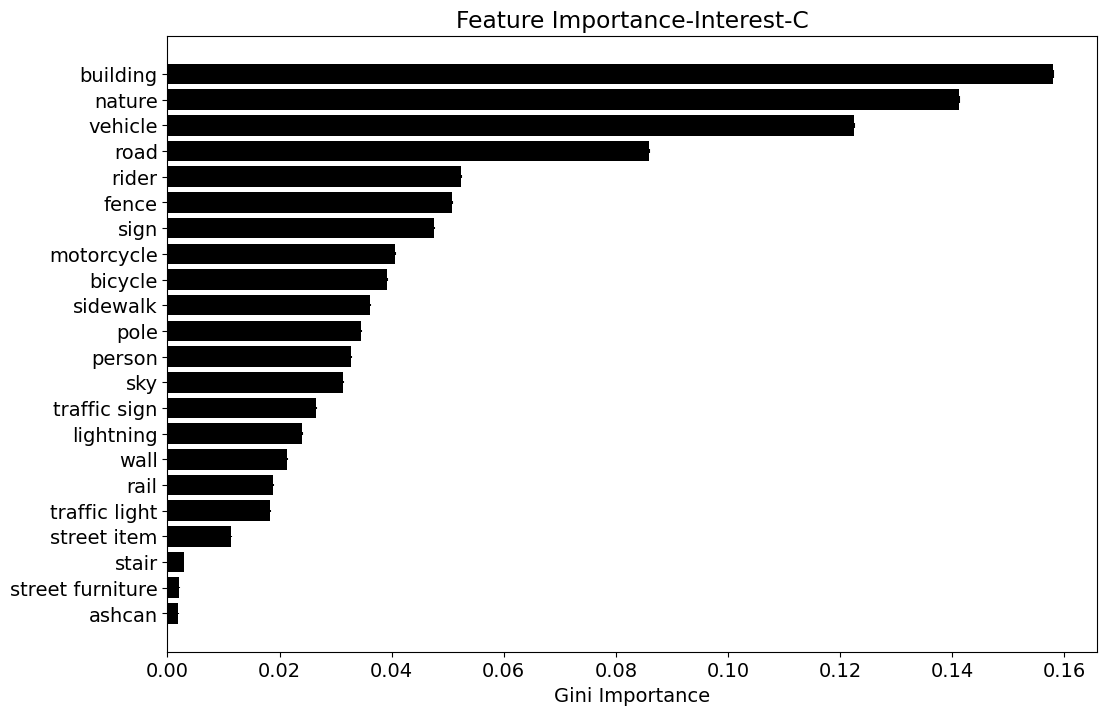

In [80]:
interestC = pd.read_csv('interestC.csv')

X = interestC.drop('mu', axis = 1)
y = interestC['mu']
df_train, df_test = train_test_split(interestC, test_size=0.25, random_state=12) 
# random_state随机状态：保证每次分割的样本一致

df_train = df_train[list(interestC.columns)] 
# 获取数据列名

df_test = df_test[list(interestC.columns)]

X_train, y_train = df_train.drop('mu',axis=1), df_train['mu']
X_test, y_test = df_test.drop('mu',axis=1), df_test['mu']

X_train.shape,y_train.shape,X_test.shape,y_test.shape



rf = RandomForestRegressor(n_estimators=200,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            oob_score=True,
                            random_state=42)
rf.fit(X_train, y_train)


features = np.array(X_train.columns)

# gini不纯度
imps_gini=rf.feature_importances_
std_gini = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0) # 计算标准差
indices_gini = np.argsort(imps_gini) 
# 将imps_gini中的元素从小到大排列，提取其在排列前对应的index(索引)输出

plt.title('Feature Importance-Interest-C')
# plt.barh（）：横向的柱状图，可以理解为正常柱状图旋转了90°
plt.barh(range(len(indices_gini)), imps_gini[indices_gini], yerr=std_gini[indices_gini],color='k', align='center')
plt.yticks(range(len(indices_gini)), features[indices_gini])
plt.xlabel('Gini Importance')
plt.show()